/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


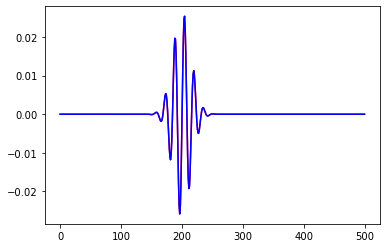

0
[1]
1
[1]
2
[1]
3
[1]
4
[1]
5
[1]
6
[1]
7
[1]
8
[1]
9
[1]
10
[1]
11
[1]
12
[1]
13
[1]
14
[1]
15
[1]
16
[1]
17
[1]
18
[1]
19
[1]
20
[1]
21
[1]
22
[1]
23
[1]
24
[1]
25
[1]
26
[1]
27
[1]
28
[1]
29
[1]
30
[1]
31
[1]
32
[1]
33
[1]
34
[1]
35
[1]
36
[1]
37
[1]
38
[1]
39
[1]
40
[1]
41
[1]
42
[1]
43
[1]
44
[1]
45
[1]
46
[1]
47
[1]
48
[1]
49
[1]
50
[1]
 Position measured to be at  [400.80160321]
51
[1]
52
[1]
53
[1]
54
[1]
55
[1]
56
[1]
57
[1]
58
[1]
59
[1]
60
[1]
61
[1]
62
[1]
63
[1]
64
[1]
65
[1]
66
[1]
67
[1]
68
[1]
69
[1]
70
[1]
71
[1]
72
[1]
73
[1]
74
[1]
75
[1]
76
[1]
77
[1]
78
[1]
79
[1]
80
[1]
81
[1]
82
[1]
83
[1]
84
[1]
85
[1]
86
[1]
87
[1]
88
[1]
89
[1]
90
[1]
91
[1]
92
[1]
93
[1]
94
[1]
95
[1]
96
[1]
97
[1]
98
[1]
99
[1]
100
[1]
101
[1]
102
[1]
103
[1]
104
[1]
105
[1]
106
[1]
107
[1]
108
[1]
109
[1]
110
[1]
111
[1]
112
[1]
113
[1]
114
[1]
115
[1]
116
[1]
117
[1]
118
[1]
119
[1]
120
[1]
121
[1]
122
[1]
123
[1]
124
[1]
125
[1]
126
[1]
127
[1]
128
[1]
129
[1]
130
[1]
131
[1]
132
[1]
13

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

#We then set up basic parameters of the simulation and animation box:

### parameters for the size of the simulation box
L = 500

### grid of x values for the functions
x = np.linspace(0,500,500)
fig, ax = plt.subplots()
plt.close()

### parameters for plot
ax.set_xlim(( 0, L))
ax.set_ylim((-0.15, 0.15))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

# function to compute the Gaussian wave packet at time t0
def Gauss_Packet(x, x0, sig, k0):
    ### need sqrt of -1!
    ci = 0+1j
    ### T1 will be the prefactor that is 1/(sigma * sqrt(2 * pi))
    T1 = 1/(sig * np.sqrt(2 * np.pi))
    ### T2 will be the Gaussian function, exp(-0.5 * ((x-x0)/sigma)^2)
    T2 = np.exp(-0.5 * ((x-x0)/sig)**2)
    ### T3 will be the complex exponential (aka the plane wave!)
    T3 = np.exp(ci * k0 * x)
    ### return the product of T1 * T2 * T3
    return T1 * T2 * T3
# Function that takes the length L, quantum number n, array of x values
# and returns the corresponding PIB energy eigenfunction
def PIB(L, n, x):
    return np.sqrt(2/L) * np.sin(n * np.pi * x/L)

### return energy in atomic units
def PIB_En(L, n):
    return n**2 * np.pi**2 /(2 * L**2)

### return time-dependent part of energy eigenfunction in atomic units
def PIB_Time(L, n, t):
    ci = 0+1j
    En = PIB_En(L, n)
    return np.exp(-ci*En*t) 
### use rectangle rule to integrate a function!
def integrate(x, f_of_x):
    ### get the width of each rectangle!
    w = x[1]-x[0]
    integral = 0
    for i in range(1,len(x)):
        h = f_of_x[i]
        A = w * h
        integral = integral + A
        
    return integral

### position eigenfunction generator!
def Position_Eigenfunction(x, x0, sig):
    ### need sqrt of -1!
    ci = 0+1j
    ### T1 will be the prefactor that is 1/(sigma * sqrt(2 * pi))
    T1 = 1/(sig * np.sqrt(2 * np.pi))
    ### T2 will be the Gaussian function, exp(-0.5 * ((x-x0)/sigma)^2)
    T2 = np.exp(-0.5 * ((x-x0)/sig)**2)
    ### T3 will be the complex exponential (aka the plane wave!)
    ### return the product of T1 * T2 
    return T1 * T2 

### Create an array of quantum numbers for the PIB states. 1 to 100 should be adequate
n_array = np.linspace(1,100,100)
### Each quantum number n has a corresponding (complex) coefficient c_n
### create a complex numpy array for the c_n values 
cn_array = np.zeros(len(n_array),dtype=complex)

### initialize Psi(x,t0) as a Gaussian wave packet
x0 = 200
sig = 15
k0 = 0.4
Psi_gp = Gauss_Packet(x, x0, sig, k0)

### Now expand Psi_gp in terms of the PIB eigenfunctions

### create a numpy array of zeros like Psi_gp
y_exp = np.zeros_like(Psi_gp)

### loop over the quantum numbers, compute the coefficient, and build the expansion
for i in range(0,100):
    ### get energy eigenstate n
    psi = PIB(L,n_array[i],x)
    ### multiply psi_n by gaussian wave packet
    integrand = np.conj(psi)*Psi_gp
    ### get coefficient c_n from the integral of psi_n * Psi_gp
    cn_array[i] = integrate(x, integrand)
    y_exp = y_exp + cn_array[i] * psi

### plot the gaussian wave packet against its expansion to see if the fit is adequate
plt.plot(x, Psi_gp, 'red')
plt.plot(x, y_exp, 'blue')
plt.show()

### Number of timesteps to update in the simulation
N_time = 250
n0 = np.array([1])
# animation function. This is called sequentially by matplotlib’s FuncAnimation function 
def animate(i):
    print(i)
    print(n0)
    ### numpy array of zeros like Psi_gp
    y = np.zeros_like(Psi_gp)

    ### This is stage 1: free evolution with initial condition Psi(x,t0)
    if i<50:
      ### expand with the stage 1 coefficients
      for j in range(0,100):
        ft = PIB_Time(L, n_array[j], i*10.)
        fx = PIB(L, n_array[j], x)
        y = y + cn_array[j] * fx * ft

    ### Transition from stage 1 to 2: make the position measurement based on P(x,t=50)
    elif i==50:
        ### expand with the stage 1 coefficients
        for j in range(0,100):
          ft = PIB_Time(L, n_array[j], i*10.)
          fx = PIB(L, n_array[j], x)
          y = y + cn_array[j] * fx * ft

        ### get probability density
        P = np.real(np.conj(y) * y)
        ### make sure P is normalized
        norm = np.sum(P)
        P_norm = P / norm
        ### measure position and get position eigenvalue/eigenfunction
        p0 = np.random.choice(x, 1, p=P_norm)
        print(" Position measured to be at ",p0)
        ### Now y is the position eigenfunction centered at x=p0[0]
        y = Position_Eigenfunction(x, p0[0], 6.)
     

        ### now get NEW expansion coefficients for the collapsed state; 
        ### these will be the stage 2 coefficients
        for j in range(0,100):
          ### get energy eigenstate n
          psi = PIB(L,n_array[j],x)
          ### multiply psi_n by gaussian wave packet
          integrand = np.conj(psi)*y
          ### get coefficient c_n from the integral of psi_n * y
          cn_array[j] = integrate(x, integrand)

          ### offset the time by the stage1 time, otherwise your wavefunction will have spread!
          ft = PIB_Time(L, n_array[j], (i-50)*10.)
          y = y + cn_array[j] * psi

    ### stage 2: free evolution of the collapsed position state!
    elif i<150:
        for j in range(0,100):
          ft = PIB_Time(L, n_array[j], (i-50)*10.)
          fx = PIB(L, n_array[j], x)
          y = y + cn_array[j] * fx * ft


    ### transition from stage 2 to 3: measure the energy!
    elif i==150:
        ### probability array of energy eigenstate state n
        pn = np.real(np.conj(cn_array) * cn_array)
        ### make sure it is normalized
        norm = np.sum(pn)
        pn_norm = pn/norm

        ### get random quantum number 
        nval = np.random.choice(n_array, 1, p=pn_norm)
        n0[0] = nval[0]
        En0 = PIB_En(L, n0[0])
        print(" Randomly measured state", n_final, "which has energy ",En0)
        ### now we are just in a single energy eigenstate
        ### offset by time by stage2 time
        ft = PIB_Time(L, n0[0], (i-150)*10)
        fx = PIB(L, n0[0], x)
        y = fx * ft
    ### continue in this state until the simulation ends
    else:
        ft = PIB_Time(L, n0[0], (i-150)*10)
        fx = PIB(L, n0[0], x)
        y = fx * ft
    ### return the x-axis and real part of the wavefunction to provide the animation
    line.set_data(x, np.real(y))
    return (line,)

# Call the animation driver
anim = animation.FuncAnimation(fig, animate, init_func=init,
                             frames=N_time, interval=100, blit=True)

# Note: below is the part which makes it work on Colab
rc('animation', html='jshtml')
anim

